# Marble Datasets

Since quarantine began, the world of sport has been upended. For months all competition stopped and sports addicts everywhere turned to highlight reels and championship reruns. The unexpected hero of the pandemic for me was the Jelle Marble League, who's marble races provided the live competitions I'd been lacking. The group Marbula One Stats (Twitter handle @MarbulaStats) has all the information on the Marbula One event races, marbles, and teams. These races took place 15 February to 5 April 2020, during the beginning of lockdown. They recorded and calculated several variables. I decided to use this data to answer the question: if you were a gambler, how should you pick the winning marble team? Since this data set is mostly performance based, I wanted to see if I could predict a championship race result based on a team's performance in this tournament. Below is a table with a description of a few of the variables in this dataset. 

| Variable name |        Meaning                           |
|---------------|-------------------------------------------|
|CIP_In-Race    |measures a marble's average performance during a race (finish position, positions gained/lost)      |
|CTP_In-Race    |measures a teams average performance      |
|CIP_weekend    |measures a marble's performance over the whole weekend (start position to finish position)          |
|CTP_weekend    |measures a teams's performance over the whole weekend                                               |
|CIP_Consistency|measures how consistently a marble performs|
|CTP_Consistency|measures how consistently a team performs  |
|PWR_Last       |Previous power ranking                     |
|PWR_Now        |Current power ranking                      |
|Av_Str_pos     |Average Starting Position                  |
|Av_fin_pos     |Average Finishing Position                 |
|Str_Val        |Starting Position Value                    |
|Fin_Val        |Finishing Position Value                   |

*Note CTP stands for Comprehensive Team Performance rating and CIP stands for Comprehensive Individual Performance Rating*

The remainder of the variables are the qualifier position, final position, and points scored for each of the 8 rounds. There are also lap times for 7 of the 8 rounds. I used their google spreadsheet to investigate some question I would considered if I was going to bet on marble racing. 

1. What scores a team more points- consistency or speed?
2. Is the qualifier position a good indication of a marbles finishing position?
3. Do marbles perform differently given the length of the track? I.E are there distance rollers and top sprinters?
4. Which of these variables would create the best stepwise regression model to predict the winners of the 5 meter sprint in the 2020 championship.

I also used the Jelles Marble Run websites for information like team logos, track lenghts, and championship information:  [Marble League Website](https://jellesmarbleruns.fandom.com/wiki/Marbula_One_Season_1)

## Looking at the Data
First, I have to install the packages I used and load the data sets from my github. Some of the packages I included are used for specific graphs. For instance, `ggimage, TeachingDemos, patchwork, and png` are used in the 1st graphic so I can plot png icons instead of points and include the line equation. `Tidyverse` is used throughout. 

Likewise, there are two csv files I read in from my github--one with marble specific data (marbles) and one with team specific data(marbles.team). There are 16 teams and 32 individual marbles with 2 marbles per team. There are 17 rows in the team data because they added a host observation to measure the performance of the host team for each round.

In [1]:
#Install Packages I need
install.packages('TeachingDemos')
install.packages('png')
install.packages("ggimage")

library('TeachingDemos')
library('png')
library('ggimage')
library('patchwork')
library('tidyverse')

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Loading required package: ggplot2

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.4     ✔ dplyr   1.0.1
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0
✔ purrr   0.3.4     

Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
#Marble Specific data and previewing the data
marbles<- read_csv('https://github.com/jcaldous/Bios512/raw/main/B%20512/Final%20project%20draft/Marbula%20One%20Statsheets%20.csv',
                  col_types = cols(
  .default = col_double(),
  Marble = col_character(),
  Team = col_character(),
  Rnk = col_character()
))
marbles%>%as_tibble()%>%print

# A tibble: 32 x 45
   Marble Team    Pts Rnk   CIP_In_Race CIP_Weekend CIP_Consistency CIP_Combined
   <chr>  <chr> <dbl> <chr>       <dbl>       <dbl>           <dbl>        <dbl>
 1 Anarc… Ball…    11 26            262         255            -2.4          224
 2 Clutt… Ball…    35 T9            486         540             6.7          477
 3 Billy  Gree…    28 14            397         472             3.6          403
 4 Malla… Gree…    36 8             563         614            17.4          567
 5 Smoggy Haze…    57 3             604         846            25.4          728
 6 Hazy   Haze…    37 7             562         595             9.4          539
 7 Vespa  Horn…     0 31             74         195           -13.8          102
 8 Hive   Horn…     8 T27           239         289            -4.3          231
 9 Limel… Lime…    24 15            398         476             3            404
10 Subli… Lime…     1 30            -14         166           -17.4           49
# … with

In [3]:
#Team Specific data and previewing the data
marbles.team<- read_csv('https://github.com/jcaldous/Bios512/raw/main/B%20512/Final%20project%20draft/Marbula%20One%20Statsheets%20-%20Team%20data.csv',
                       col_types=cols(
                              .default = col_double(),
                              Team = col_character(),
                              Rnk = col_character()
                       ))

marbles.team%>%as_tibble()%>%print

# A tibble: 17 x 37
   Team    Pts Rnk   CTP_In_Race CTP_Weekend CTP_Consistency CTP_Combined
   <chr> <dbl> <chr>       <dbl>       <dbl>           <dbl>        <dbl>
 1 Sava…   101 1             595         960             8.4          692
 2 Haze…    94 2             583         950             9.3          687
 3 O'Ra…    69 3             455         736             2.5          515
 4 Gree…    64 T5            480         699             4.8          513
 5 Snow…    66 4             466         662             2.5          481
 6 Team…    64 T5            481         625             3.9          472
 7 Team…    54 7             353         606            -1.5          403
 8 Mell…    44 10            330         629            -3.8          398
 9 Thun…    49 8             375         572            -0.8          395
10 Team…    39 11            324         575            -2.9          373
11 Host…    39 NA            414         448             0.9          352
12 Rojo…    32 13 

# What Scores a Team More Points: Consistency Vs Speed

I was curious about whether, in marble racing, consistency or mean time had a better correlation to points scored. I believe that consistency is more important in sport in general, but I wanted to check if the same was true for marble racing. To do so, I graphed CTP consistency scores against the teams' point totals over the 8 rounds and the mean team times for 7 of the 8 rounds against the total points. I fitted a line of best fit to both and printed the equation and r^2 values for both on the graphs. 
*Note: There were no lap times for Round 8.*

I also wanted to use the team logos instead of points since many of the teams colors are the same. This way they are easier to distinguish. In order to do so I used the package `ggimage` which can be used in ggplot to plot icons as scatter plot points. First, however, I had to create a column with the links to png files on my github. Here is the document I took the logos from with the team names. Not all these team logos seen here are included in this data set, nor were these standings relevant for this event. ![alt text here](https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Screen%20Shot%202020-11-16%20at%202.02.43%20PM.png)

In [4]:
#loading the team logos from my github and adding a logo column to marble.team dataset arranged by Team
gal <- 'https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Galactic.png'
chaos <- 'https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Chaos.png'
hazer <- 'https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Hazers.png'
hornet <- 'https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Hornet.png'
mellow <- 'https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Mellow.png'
momo <- 'https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Momo.png'
orangers <- 'https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Orangers.png'
primary <- 'https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Primary.png'
raspberry <- 'https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Raspberry.png'
rojo <- 'https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Rojo.png'
snow <- 'https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Snowball.png'
speeders <- 'https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Speedy.png'
whisps <- 'https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Whisps.png'
bolts <- 'https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/bolts.png'
ducks <- 'https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/ducks.png'
host <-'https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/host.png'
limer<-'https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Limer.png'
#list the links in alphabetical order by full team name
logos<- c(chaos,ducks,hazer,hornet,host,limer,mellow,whisps,
          orangers,raspberry,rojo,speeders,snow,gal,momo,primary,
          bolts)
#arrange in alphabetical order
mar.tm<-marbles.team%>%arrange(Team)
#add logo column
mar.tm$logo<- logos
#preview 
mar.tm%>%head

Team,Pts,Rnk,CTP_In_Race,CTP_Weekend,CTP_Consistency,CTP_Combined,PWR_Last,PWR_Now,Av_Str_pos,⋯,R6_Qual,R6_Fin,R6_Pts,R7_Qual,R7_Fin,R7_Pts,R8_Qual,R8_Fin,R8_Pts,logo
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Balls of Chaos,46,9,319,504,-3.0,336,14,12,10.38,⋯,10,15,0,15,5,10,3,5,10,https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Chaos.png
Green Ducks,64,T5,480,699,4.8,513,3,4,8.13,⋯,13,9,2,7,11,0,4,2,18,https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/ducks.png
Hazers,94,2,583,950,9.3,687,1,2,5.75,⋯,5,8,4,2,1,25,15,8,4,https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Hazers.png
Hornets,8,16,156,261,-13.4,124,16,16,10.38,⋯,7,14,0,11,15,0,12,14,0,https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Hornet.png
Host Team,39,NA,414,448,0.9,352,NA,NA,11.63,⋯,8,2,18,14,9,2,7,11,0,https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/host.png
Limers,25,15,192,382,-8.0,217,15,15,9.50,⋯,9,16,0,6,14,0,16,16,0,https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Limer.png


In [5]:
#equation for the line of best fit between points and consistency score
lm_eqn <- function(mar.tm){
  m <- lm(Pts ~ CTP_Consistency, mar.tm);
  eq <- substitute(italic(Pts) == a + b %.% italic(CTP_Consistency)*","~~italic(r)^2~"="~r2, 
                   list(a = format(unname(coef(m)[1]), digits = 2),
                        b = format(unname(coef(m)[2]), digits = 2),
                        r2 = format(summary(m)$r.squared, digits = 3)))
  as.character(as.expression(eq));
}

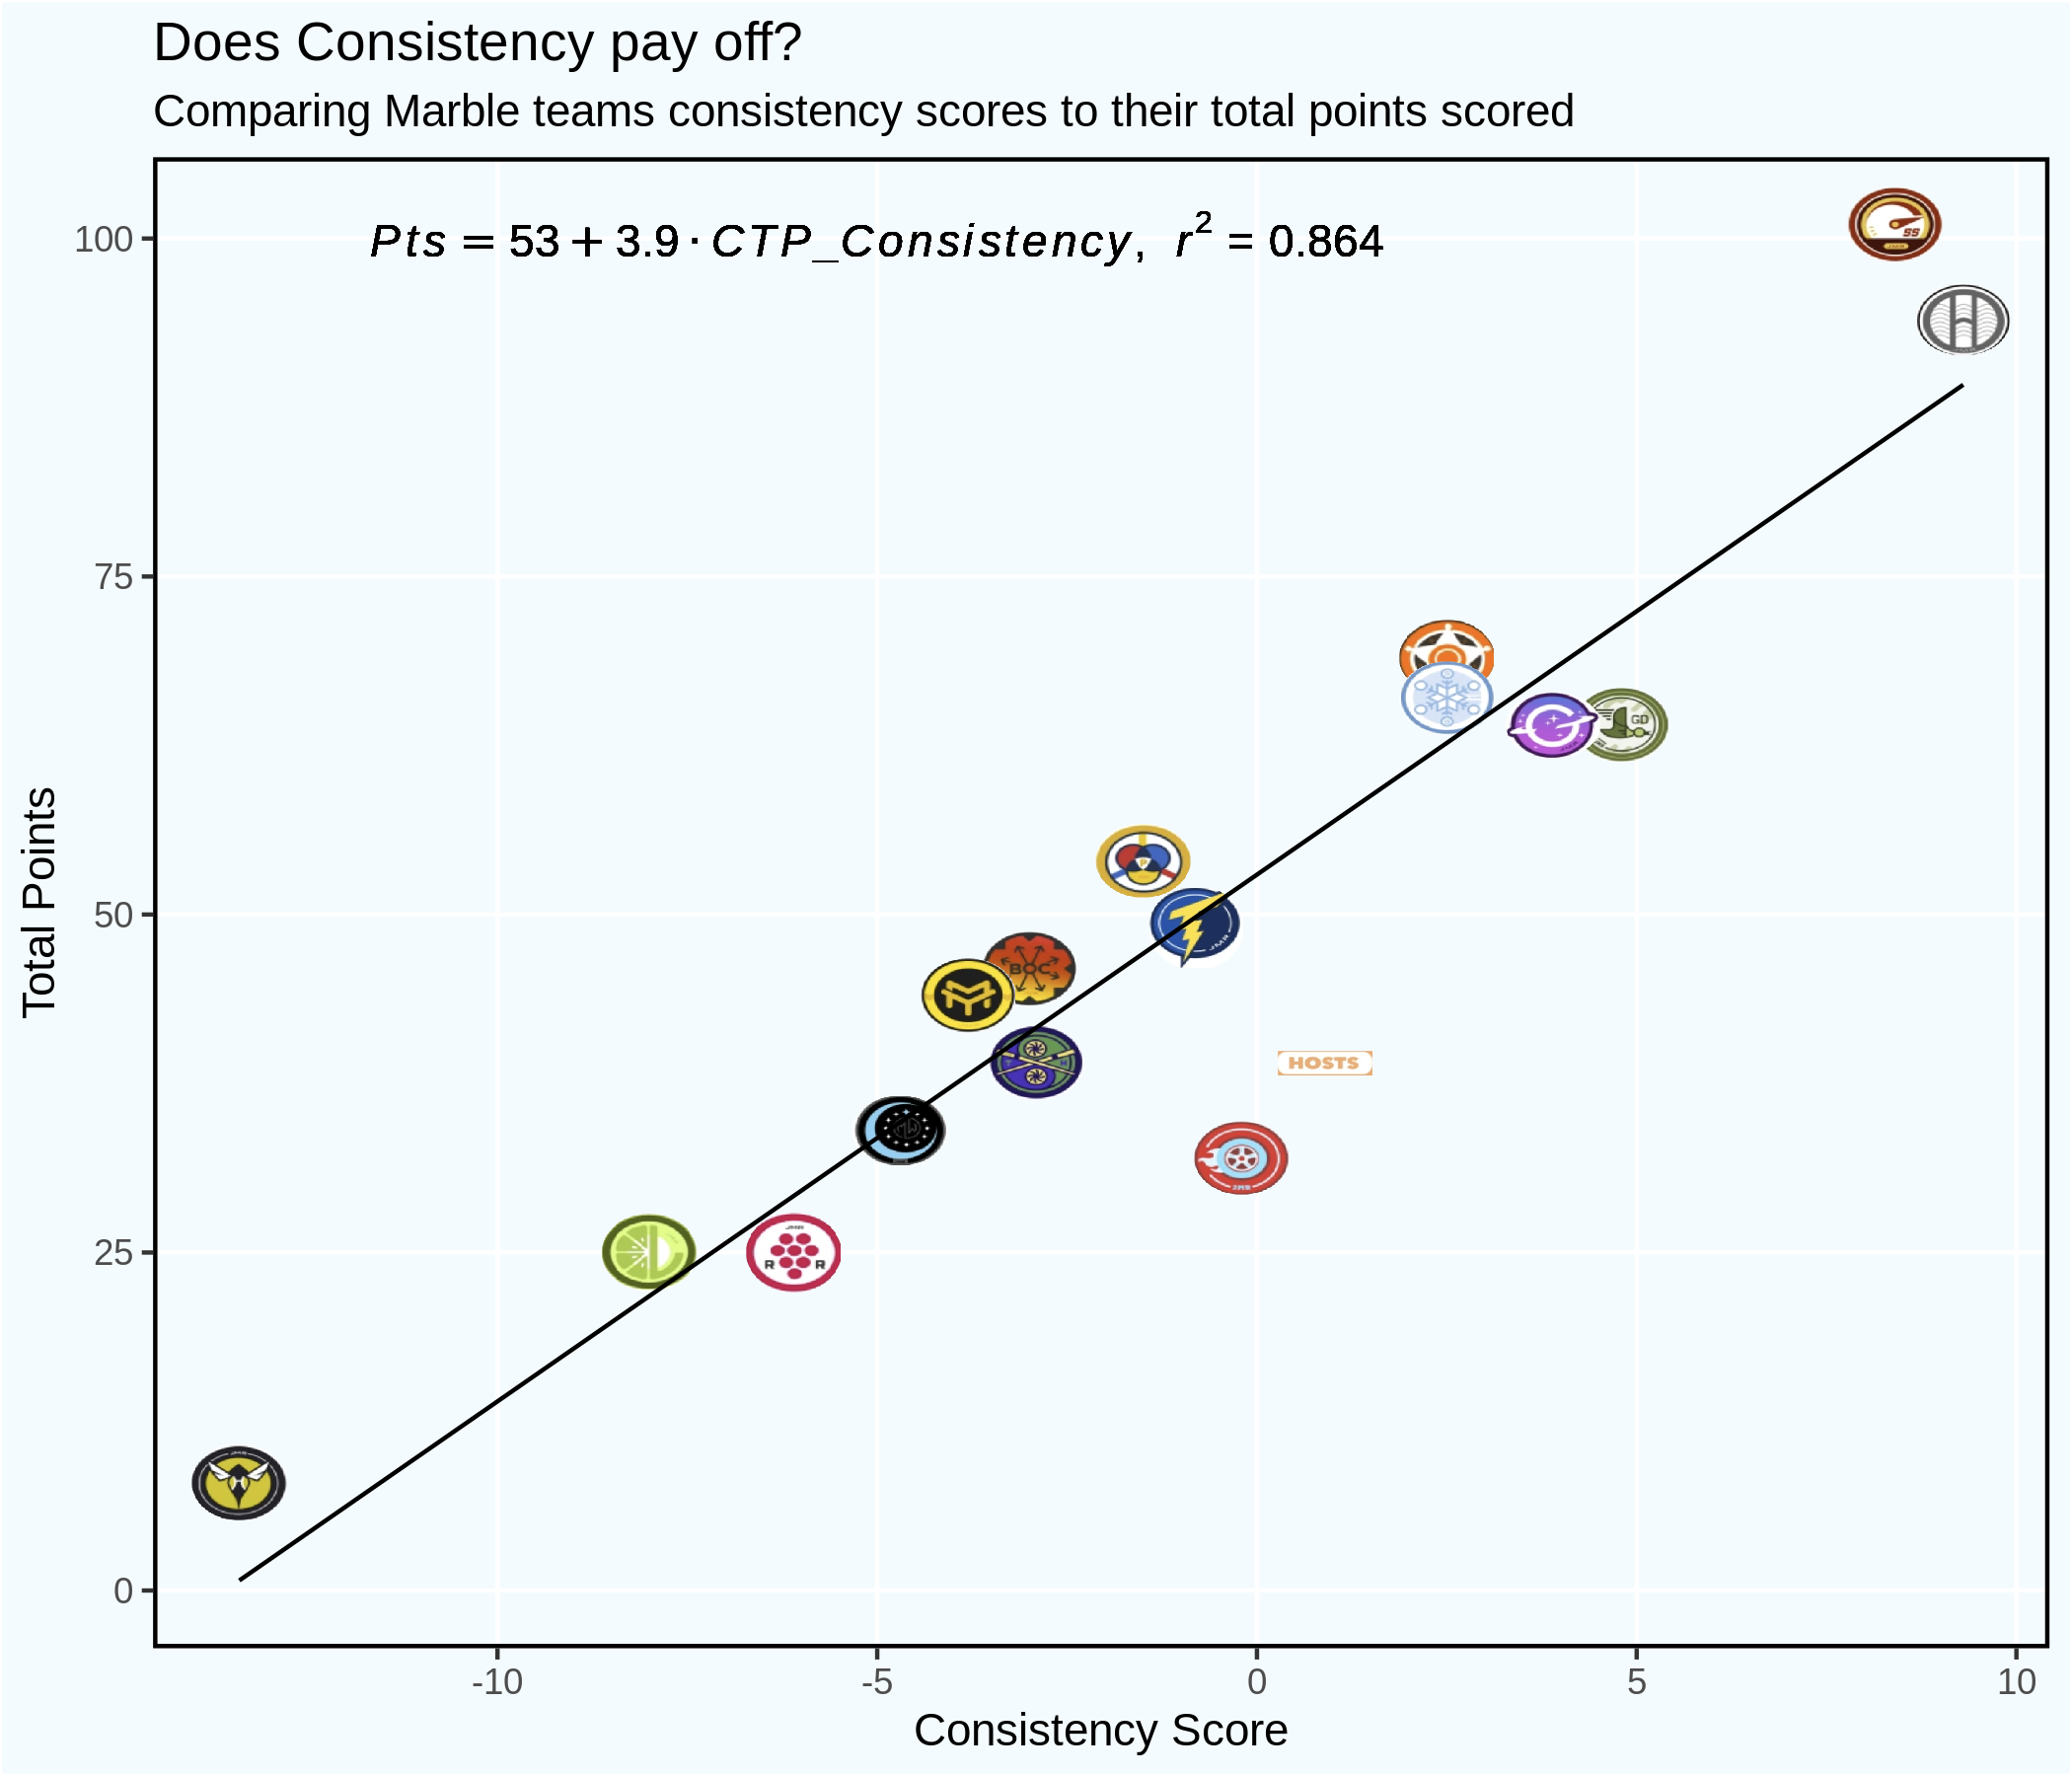

In [6]:
#Graphing consistency score vs total points 
options(repr.plot.width=7, repr.plot.height=6, repr.plot.res=300)
p=ggplot(mar.tm, aes(x=CTP_Consistency, y=Pts))
p=p+ geom_image(aes(image=logo), size=.05) + #uses logos instead of points
  geom_smooth(method=lm, size=0.5, color='black', formula= 'y ~ x', se=FALSE) #adds a linear regression model
p=p+labs(title="Does Consistency pay off?", 
         subtitle="Comparing Marble teams consistency scores to their total points scored",
         x="Consistency Score",
         y="Total Points"
         )+
    theme(panel.background = element_rect(fill = '#f4fbfe'),
          plot.background = element_rect(fill = '#f4fbfe'),
          panel.grid.minor = element_blank(),
          panel.border = element_rect(fill=NA,size=1)) 
p=p
p+geom_text(x = -5, y = 100, label = lm_eqn(mar.tm), parse = TRUE)

Looking at the line of best fit and the r^2, there is a fairly strong corelation between consistency scores and overall perfromance. Now lets look at mean time.

In [7]:
# Calculating the mean time with the round times from the marbles data and joining it with the mar.tm data used above
marb<-marbles%>% group_by(Team)%>% 
             select(Team,R1_time,R2_time,R3_times,R4_times,R5_Times,R6_Times,R7_Times)%>% 
             summarise(mean.time=mean(c(R1_time,R2_time,R3_times,R4_times,R5_Times,R6_Times,R7_Times),na.rm = TRUE))
mar.time<- marb%>%full_join(mar.tm)

`summarise()` ungrouping output (override with `.groups` argument)

Joining, by = "Team"



In [8]:
#line of best fit equation
lm_eqn <- function(mar.time){
  m <- lm(Pts ~ mean.time, mar.time);
  eq <- substitute(italic(Pts) == a + b %.% italic(mean.time)*","~~italic(r)^2~"="~r2, 
                   list(a = format(unname(coef(m)[1]), digits = 2),
                        b = format(unname(coef(m)[2]), digits = 2),
                        r2 = format(summary(m)$r.squared, digits = 3)))
  as.character(as.expression(eq));
}

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 1 rows containing missing values (geom_image).”


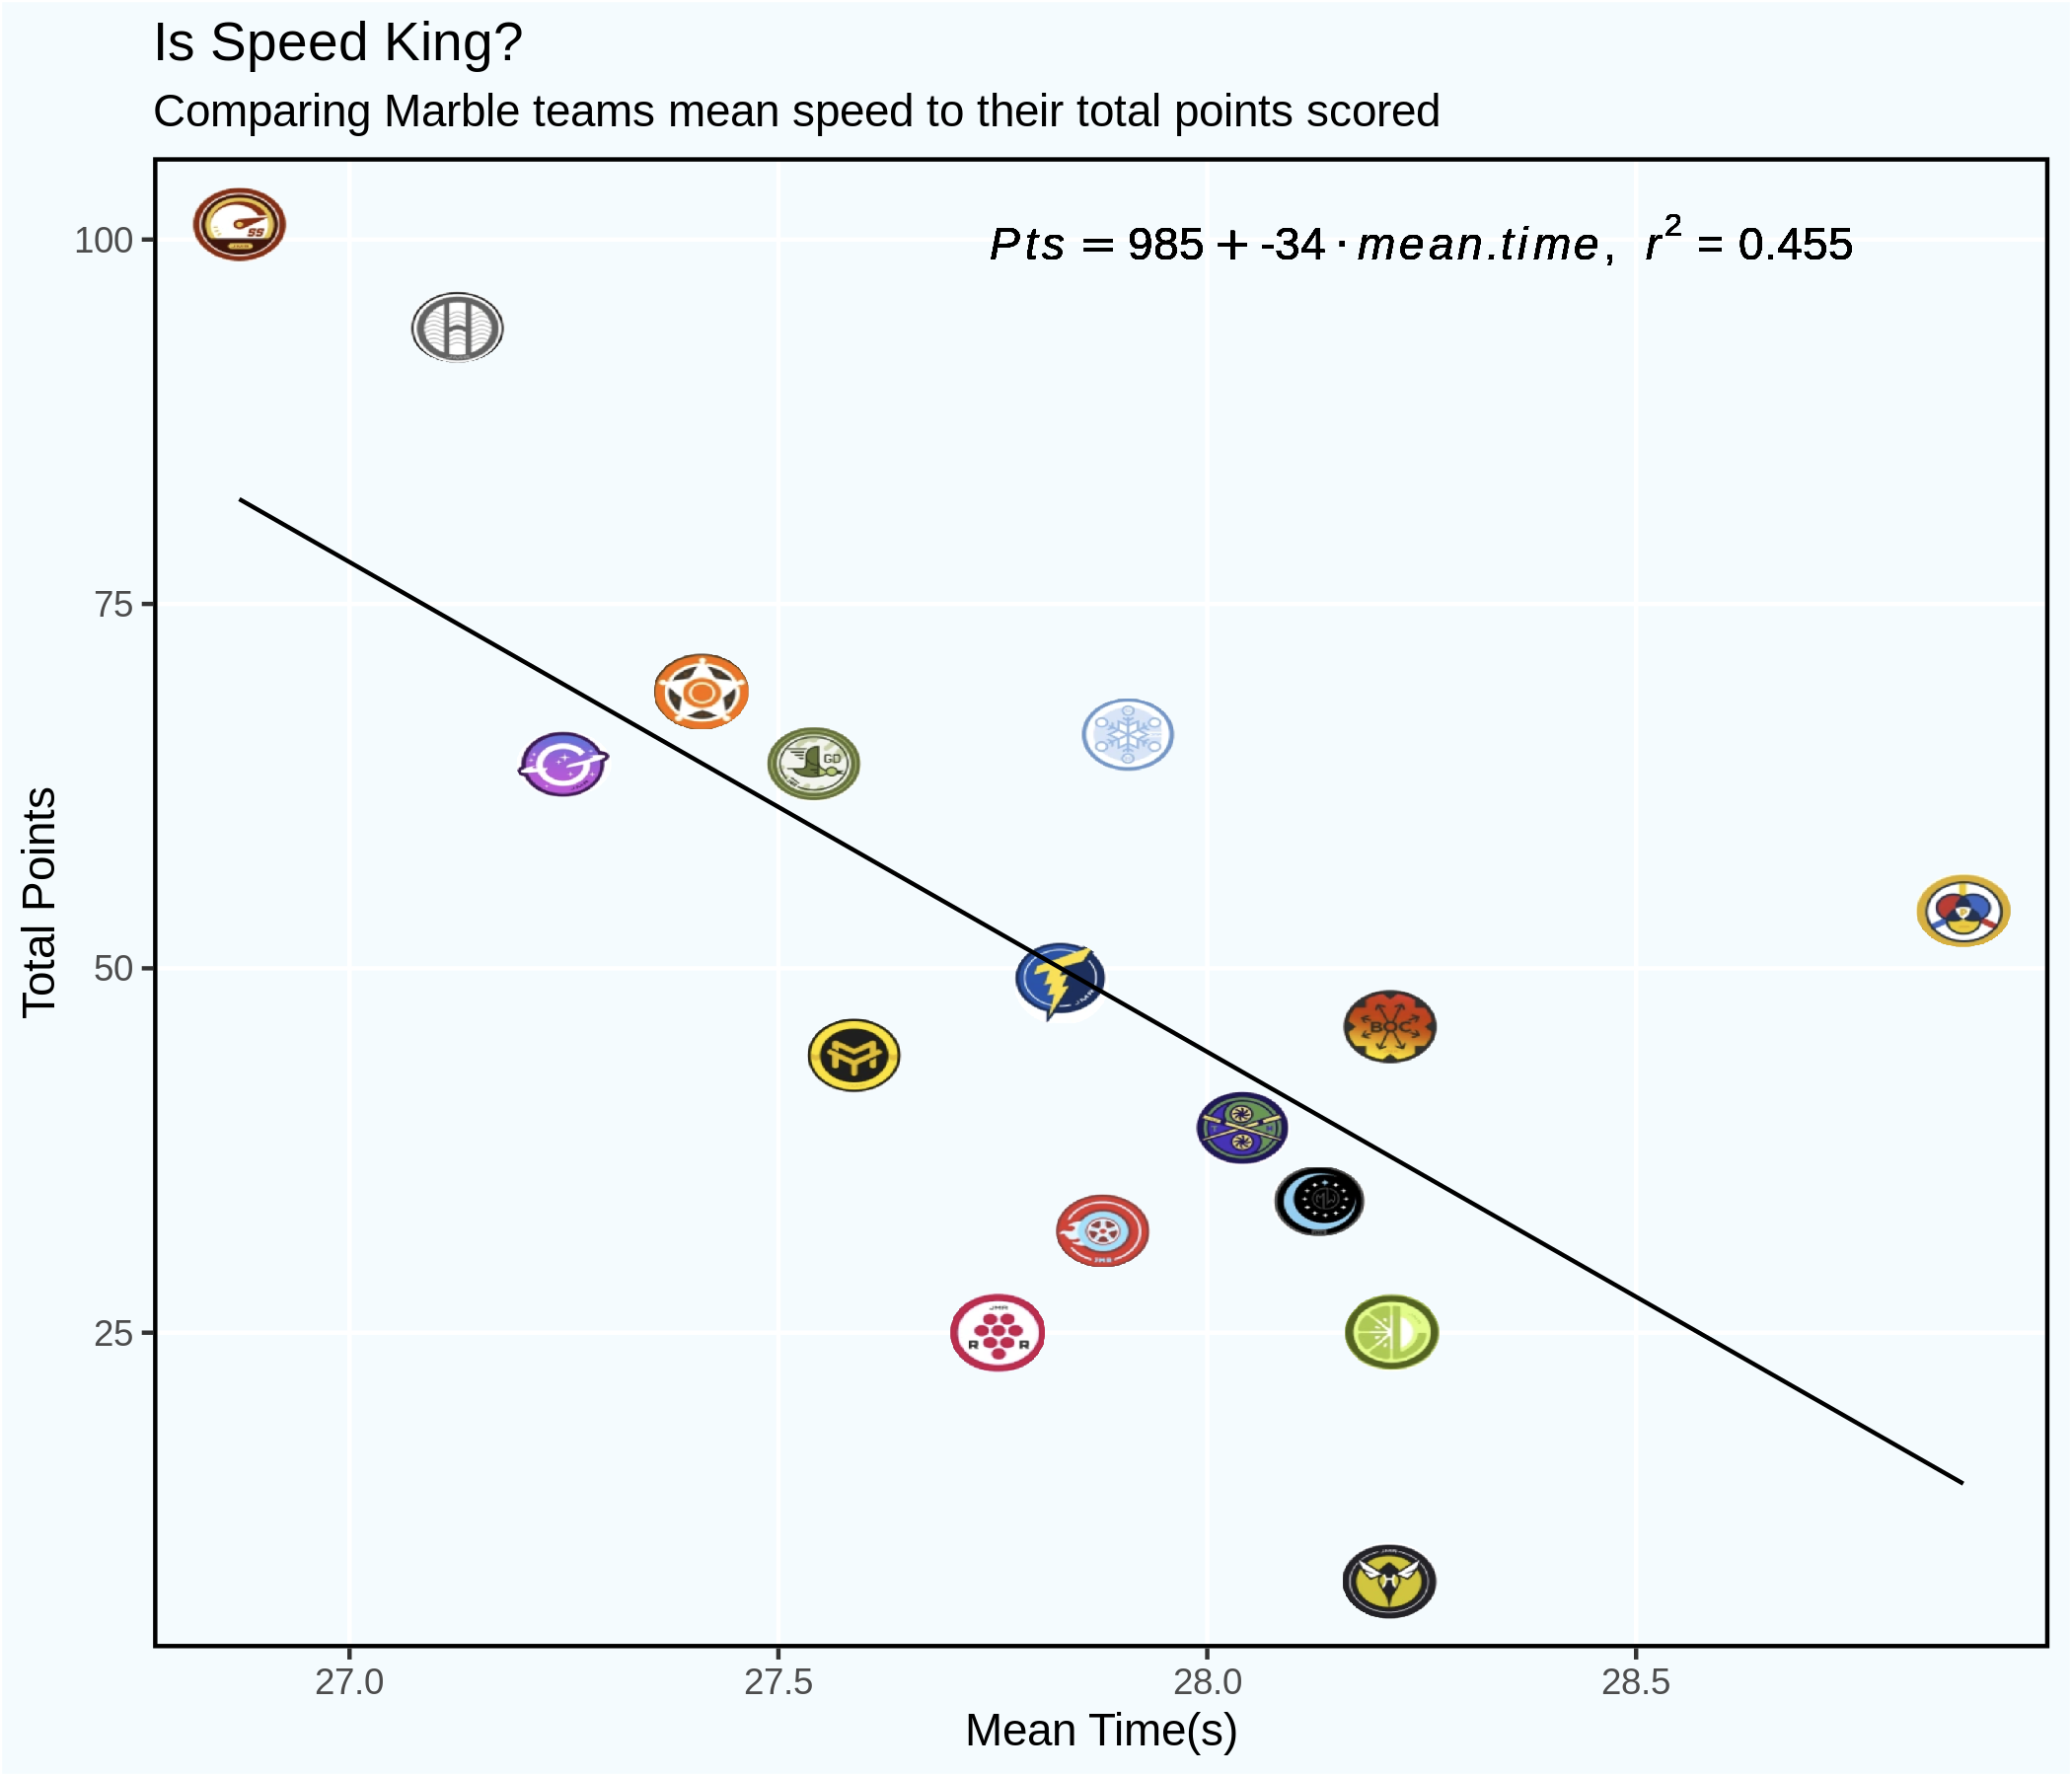

In [9]:
#Making a similar plot to the one above
p1=ggplot(mar.time, aes(x=mean.time, y=Pts))
p1=p1+ geom_image(aes(image=logo), size=.05) + 
  geom_smooth(method=lm, size=0.5, color='black', se=FALSE) 
p1=p1+labs(title="Is Speed King?", 
         subtitle="Comparing Marble teams mean speed to their total points scored",
         x="Mean Time(s)",
         y="Total Points"
     )+
    theme(panel.background = element_rect(fill = '#f4fbfe'),
          plot.background = element_rect(fill = '#f4fbfe'),
          panel.grid.minor = element_blank(),
          panel.border = element_rect(fill=NA,size=1))
p1=p1+geom_text(x = 28.25, y = 100, label = lm_eqn(mar.time), parse = TRUE)

p1

Mean time has an r^2 that is about half that of the consistency score. So, consistency trumps speed when considering winning marbles. 

# Is the qualifier position a good indication of a marbles finishing position?

For me, the qualifier is the preview of the main race. However, how good is the qualifier at estimating the final results? Does winning the qualifier mean a marble will win the final race, or is there no relationship between the two?

In order to measure this, I transformed the data into a long format with the following columns: Marble, Team, Round, Qualifier Position(Qual), and Points(Pts). I then calculated the expected points based on qualifier position(col= expected),  the difference between expected and actual points (col=difference), and whether the difference is positive or not (col= pos). 

Using this transformed dataset, I created a boxplot distribution per round of the difference between the actual points scored minus the expected. Any positive difference means the marble placed higher in the final than in the Qualifier and a negative difference means it placed lower.  


In [10]:
#Creating the dataset with the desired shape
mar1<-marbles%>%select(Marble,Team, R1_Qual,R1_Pts,R2_Pts, R3_Pts,R4_Pts,R5_Pts,R6_Pts,R7_Pts,R8_Pts, R2_Qual, R3_Qual,R4_Qual,R5_Qual,R6_Qual,R7_Qual,R8_Qual)
mar.long<-mar1%>%
    as_tibble %>%
    pivot_longer(cols = !c(Marble,Team))
#creating the round and column names in col
mar.long$round<-substr(mar.long$name, 1, 2)
mar.long$col<-ifelse(substr(mar.long$name, 3, 4)=="_Q", mar.long$col<-"Qual", mar.long$col<-"Pts")
mar.long$name<-NULL

mar.wide = mar.long %>%
      as_tibble %>%
     pivot_wider(id_cols = c( Marble, Team, round), names_from = col, values_from = value)
#adding the expected values column
mar.wide$expected<-ifelse(mar.wide$Qual== 1, mar.wide$expected<-25,
                     ifelse(mar.wide$Qual==2,mar.wide$expected<-18, 
                     ifelse(mar.wide$Qual==3,mar.wide$expected<-15,
                     ifelse(mar.wide$Qual==4,mar.wide$expected<-12,
                     ifelse(mar.wide$Qual==5,mar.wide$expected<-11,
                     ifelse(mar.wide$Qual==6,mar.wide$expected<-8,
                     ifelse(mar.wide$Qual==7,mar.wide$expected<-6,
                     ifelse(mar.wide$Qual==8,mar.wide$expected<-4,
                     ifelse(mar.wide$Qual==9,mar.wide$expected<-2,
                     ifelse(mar.wide$Qual==10,mar.wide$expected<-1,
                     ifelse(mar.wide$Qual %in% c(11,12,13,14,15,16) ,mar.wide$expected<-0,mar.wide$expected<-NA)))))))))))
#adding the difference and pos column using mutate
mar.wide<-mar.wide%>%group_by(round)%>%mutate(difference=(Pts-expected),pos=(difference>0))

`summarise()` ungrouping output (override with `.groups` argument)

Warning message:
“Removed 128 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 128 rows containing missing values (geom_point).”


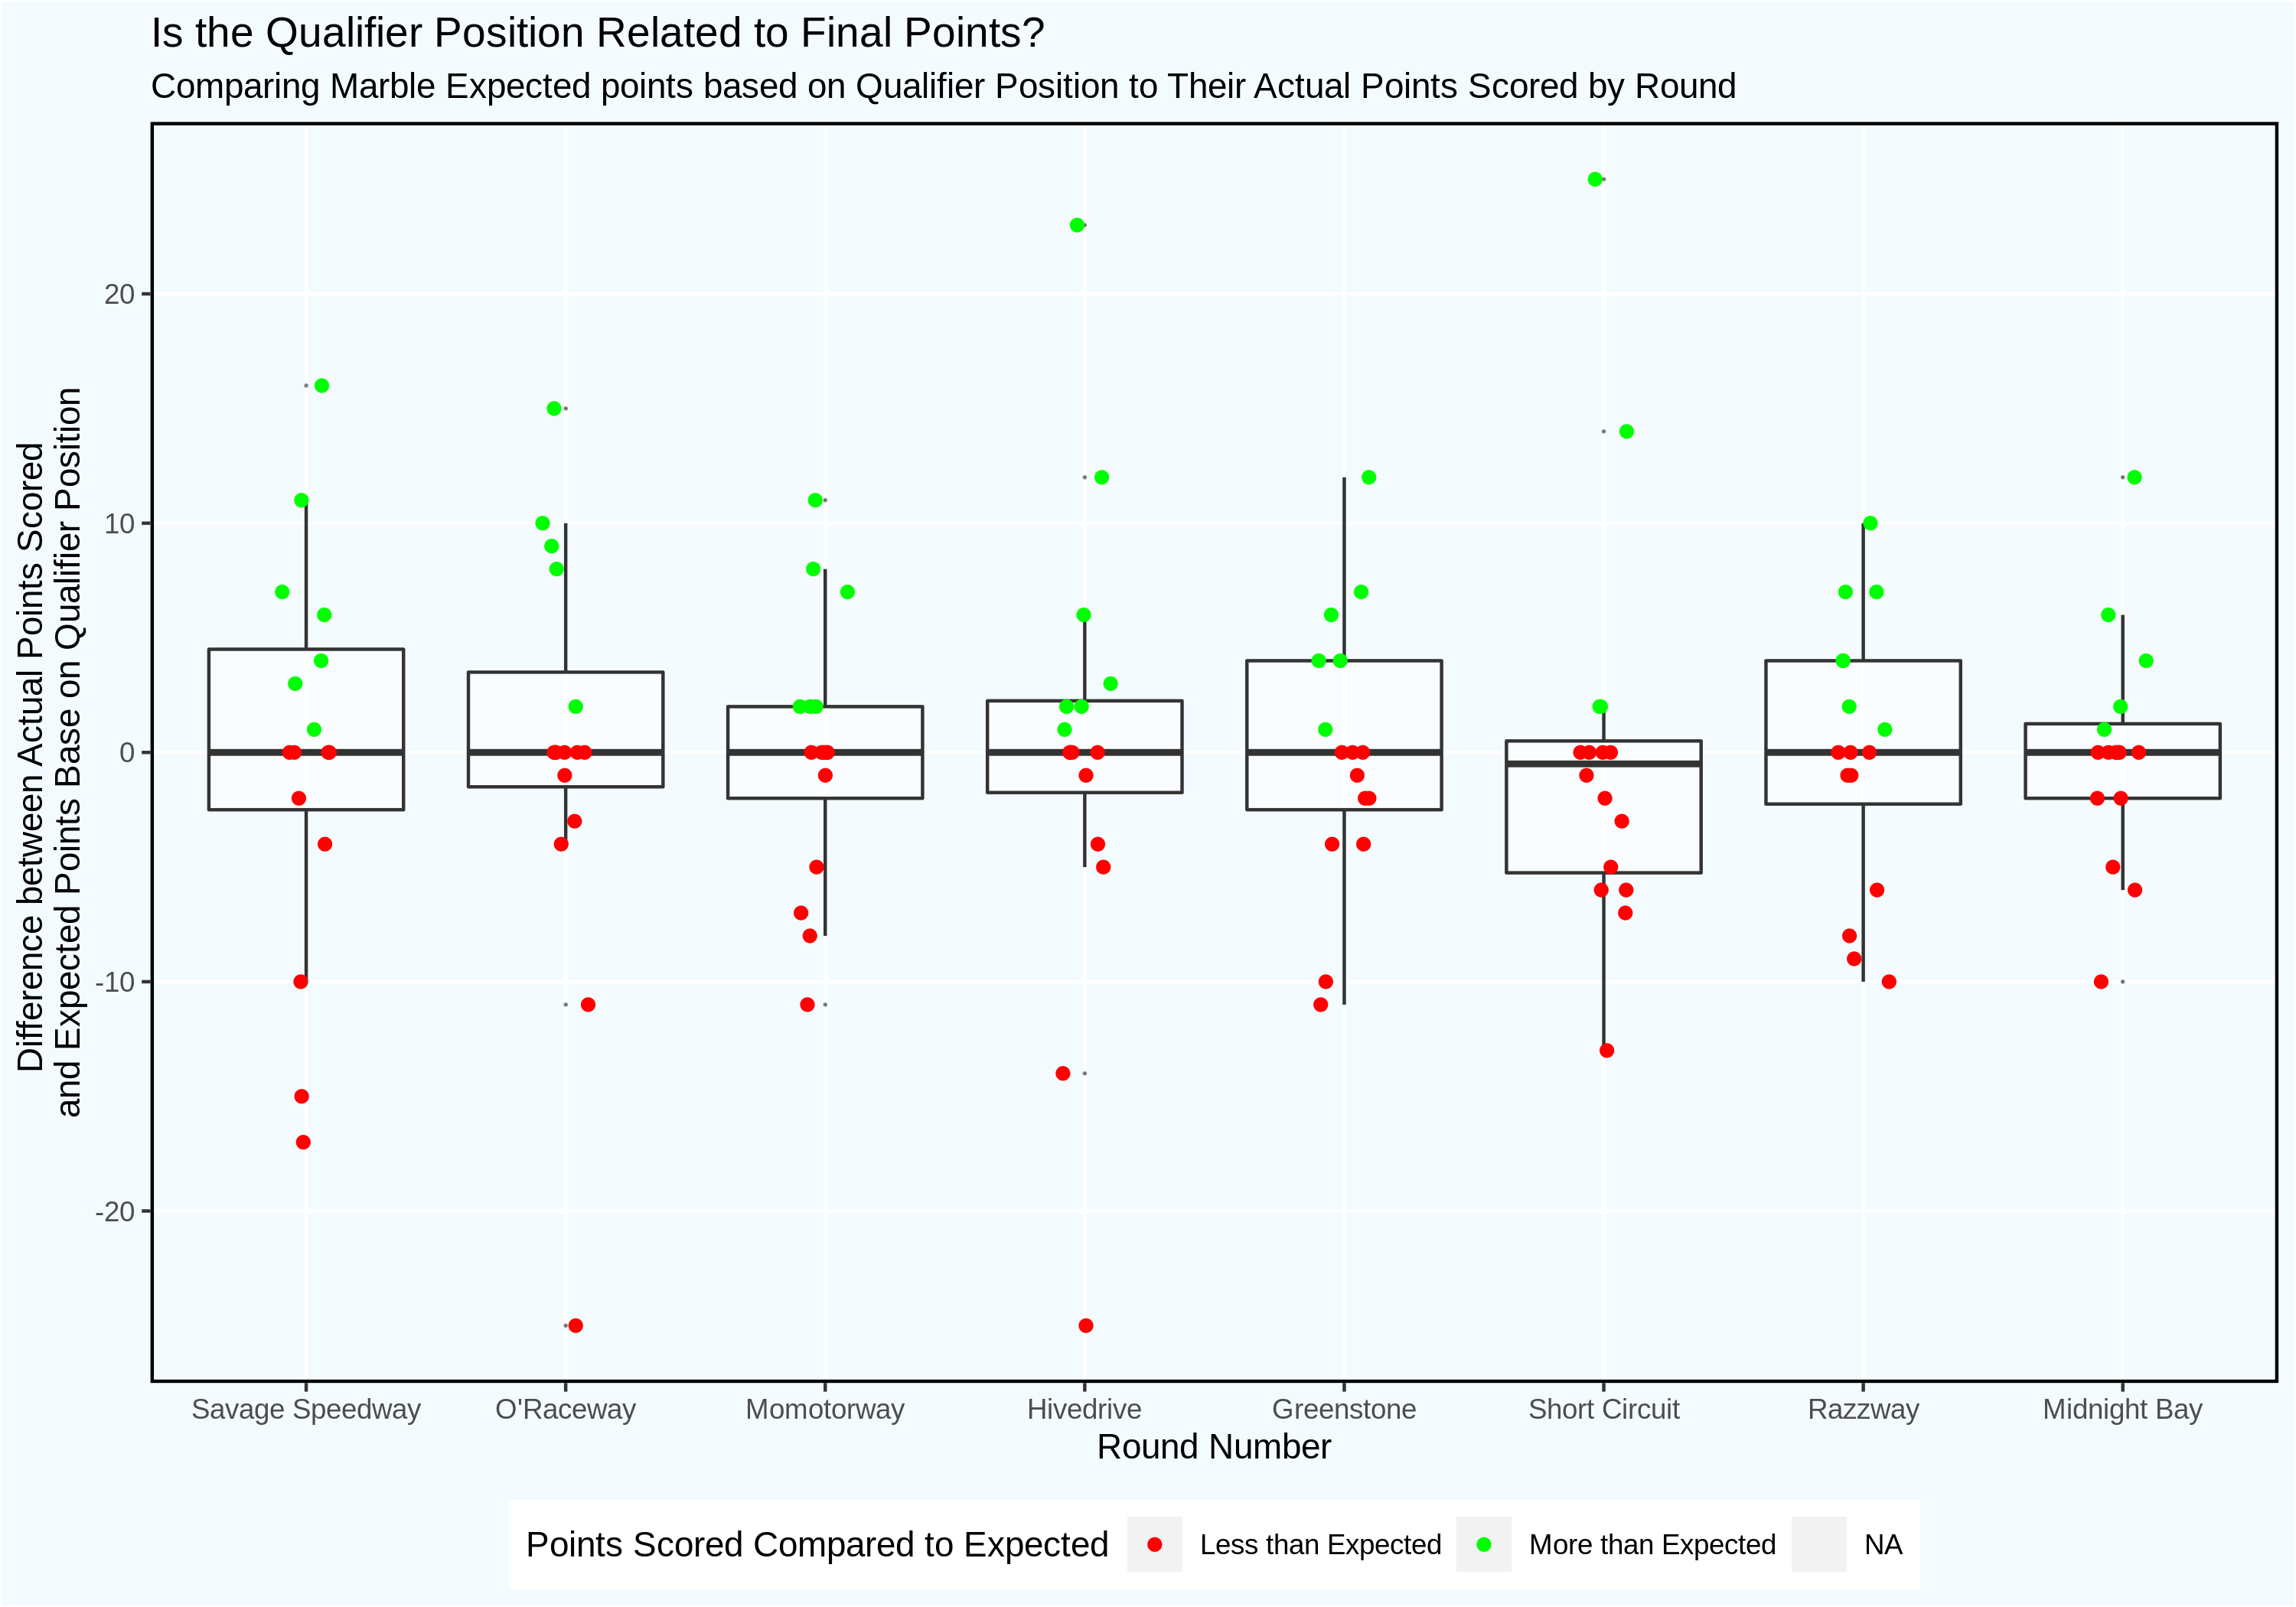

In [11]:
options(repr.plot.width=10, repr.plot.height=7, repr.plot.res=300)

mar.mediandif<-mar.wide%>%group_by(round)%>%summarize(difference=median(difference, na.rm=TRUE))

q1=ggplot(mar.wide, aes(x=round,y=difference))+geom_boxplot(alpha=0.5, outlier.size = 0)+
    geom_point(aes(color=pos),position=position_jitter(w=.1,h=0))

q1=q1+labs(title="Is the Qualifier Position Related to Final Points?", 
         subtitle="Comparing Marble Expected points based on Qualifier Position to Their Actual Points Scored by Round",
         x="Round Number",
         y="Difference between Actual Points Scored 
and Expected Points Base on Qualifier Position")+
        theme(legend.position="bottom",
              panel.background = element_rect(fill = '#f4fbfe'),
              plot.background = element_rect(fill = '#f4fbfe'),
              panel.grid.minor = element_blank(),
              panel.border = element_rect(fill=NA,size=1))+
        scale_x_discrete(labels = c('Savage Speedway',"O'Raceway",'Momotorway','Hivedrive','Greenstone','Short Circuit','Razzway','Midnight Bay'))+
        scale_color_manual(values=c("red","green","grey"),labels =c("Less than Expected", "More than Expected","NA"),name = "Points Scored Compared to Expected",)
q1

For each round, the median difference is about 0. This means that the marbles scored about the same in the final race as they were expected to given their qualifying position. However, there is a lot of variation as you can see in the points.  Therefore, going off of who one the qualifier might be a good bet, but there is still a chance for a large jump in position.

# Who is a distance roller and who is the top sprinting marbles?

The Marbula 1 is an 8 race event and I wanted to know if certain teams did better on longer courses vs shorter courses. I also wanted to know if the individual marbles had a track lenght preference as well. I thought that if one team performed well on the shorter tracks, they might score higher in the 5 meter sprint.
Therefore, I looked at the distance of the 8 speedways. 

- R1 Savage speedway: 12.81m, 13 turns
- R2 O'Raceway: 14.05m, 11 turns
- R3 Momotorway: 12.05m, 13 turns
- R4 Hivedrive: 13.20m, 11 turns
- R5 Greenstone: 14.55m, 23 turns
- R6 Short Circuit: 11.90m, 8 turns
- R7 Razzway: 14.38m, 15 turns
- R8 Midnight Bay: 12.84 m,15 turns

I wanted to classify the tracks as distance or sprints according to the mean. First, I need to know the mean track length. 

In [12]:
tr.len<-c(12.81,14.05,12.05,13.20,14.55,11.90,14.38,12.84)
mean(tr.len)

[1] 13.2225

Using the mean as the thresholds, I labeled tracks longer than the mean as distance and shorter than the mean as sprints. I created "Short_Pts" and "Long_Pts" columns which recorded total points scored on short or long tracks. 

The distance tracks were: O'Raceway, Greenstone, and Razzway.

The sprints are: Savage speedway, Momotorway, Hivedrive, Short Circuit, and Midnight Bay.

I then used summarize to calculate the total short and long points per marble. Using  `pivot_longer`, I created a long dataset used to graph bar charts for each marble faceted by team.

In [13]:
mar.wide$Short_Pts<-ifelse(mar.wide$round %in% c("R1","R3","R4","R6","R8"),mar.wide$Short_Pts<-mar.wide$Pts, mar.wide$Short_Pts<-NA)
mar.wide$Long_Pts<-ifelse(mar.wide$round %in% c("R2","R5","R7"),mar.wide$Long_Pts<-mar.wide$Pts,mar.wide$Long_Pts<-NA)
mar.wide%>%as_tibble()%>%print

# A tibble: 256 x 10
   Marble  Team   round  Qual   Pts expected difference pos   Short_Pts Long_Pts
   <chr>   <chr>  <chr> <dbl> <dbl>    <dbl>      <dbl> <lgl>     <dbl>    <dbl>
 1 Anarchy Balls… R1       NA    NA       NA         NA NA           NA       NA
 2 Anarchy Balls… R2        9     1        2         -1 FALSE        NA        1
 3 Anarchy Balls… R3       NA    NA       NA         NA NA           NA       NA
 4 Anarchy Balls… R4       14     0        0          0 FALSE         0       NA
 5 Anarchy Balls… R5       NA    NA       NA         NA NA           NA       NA
 6 Anarchy Balls… R6       10     0        1         -1 FALSE         0       NA
 7 Anarchy Balls… R7       15    10        0         10 TRUE         NA       10
 8 Anarchy Balls… R8       NA    NA       NA         NA NA           NA       NA
 9 Clutter Balls… R1       15     0        0          0 FALSE         0       NA
10 Clutter Balls… R2       NA    NA       NA         NA NA           NA       NA
# … wit

In [14]:
#creating the dataset
mar.distance<-mar.wide%>%
    group_by(Marble,Team)%>%
    summarize(Short_Pts=sum(Short_Pts,na.rm=NA),Long_Pts=sum(Long_Pts,na.rm=NA))

mar.distance<-mar.distance%>%
    as_tibble %>%
    pivot_longer(cols = !c(Marble,Team))
mar.distance%>%head


`summarise()` regrouping output by 'Marble' (override with `.groups` argument)



Marble,Team,name,value
<chr>,<chr>,<chr>,<dbl>
Anarchy,Balls of Chaos,Short_Pts,0
Anarchy,Balls of Chaos,Long_Pts,11
Billy,Green Ducks,Short_Pts,2
Billy,Green Ducks,Long_Pts,26
Bolt,Thunderbolts,Short_Pts,2
Bolt,Thunderbolts,Long_Pts,29


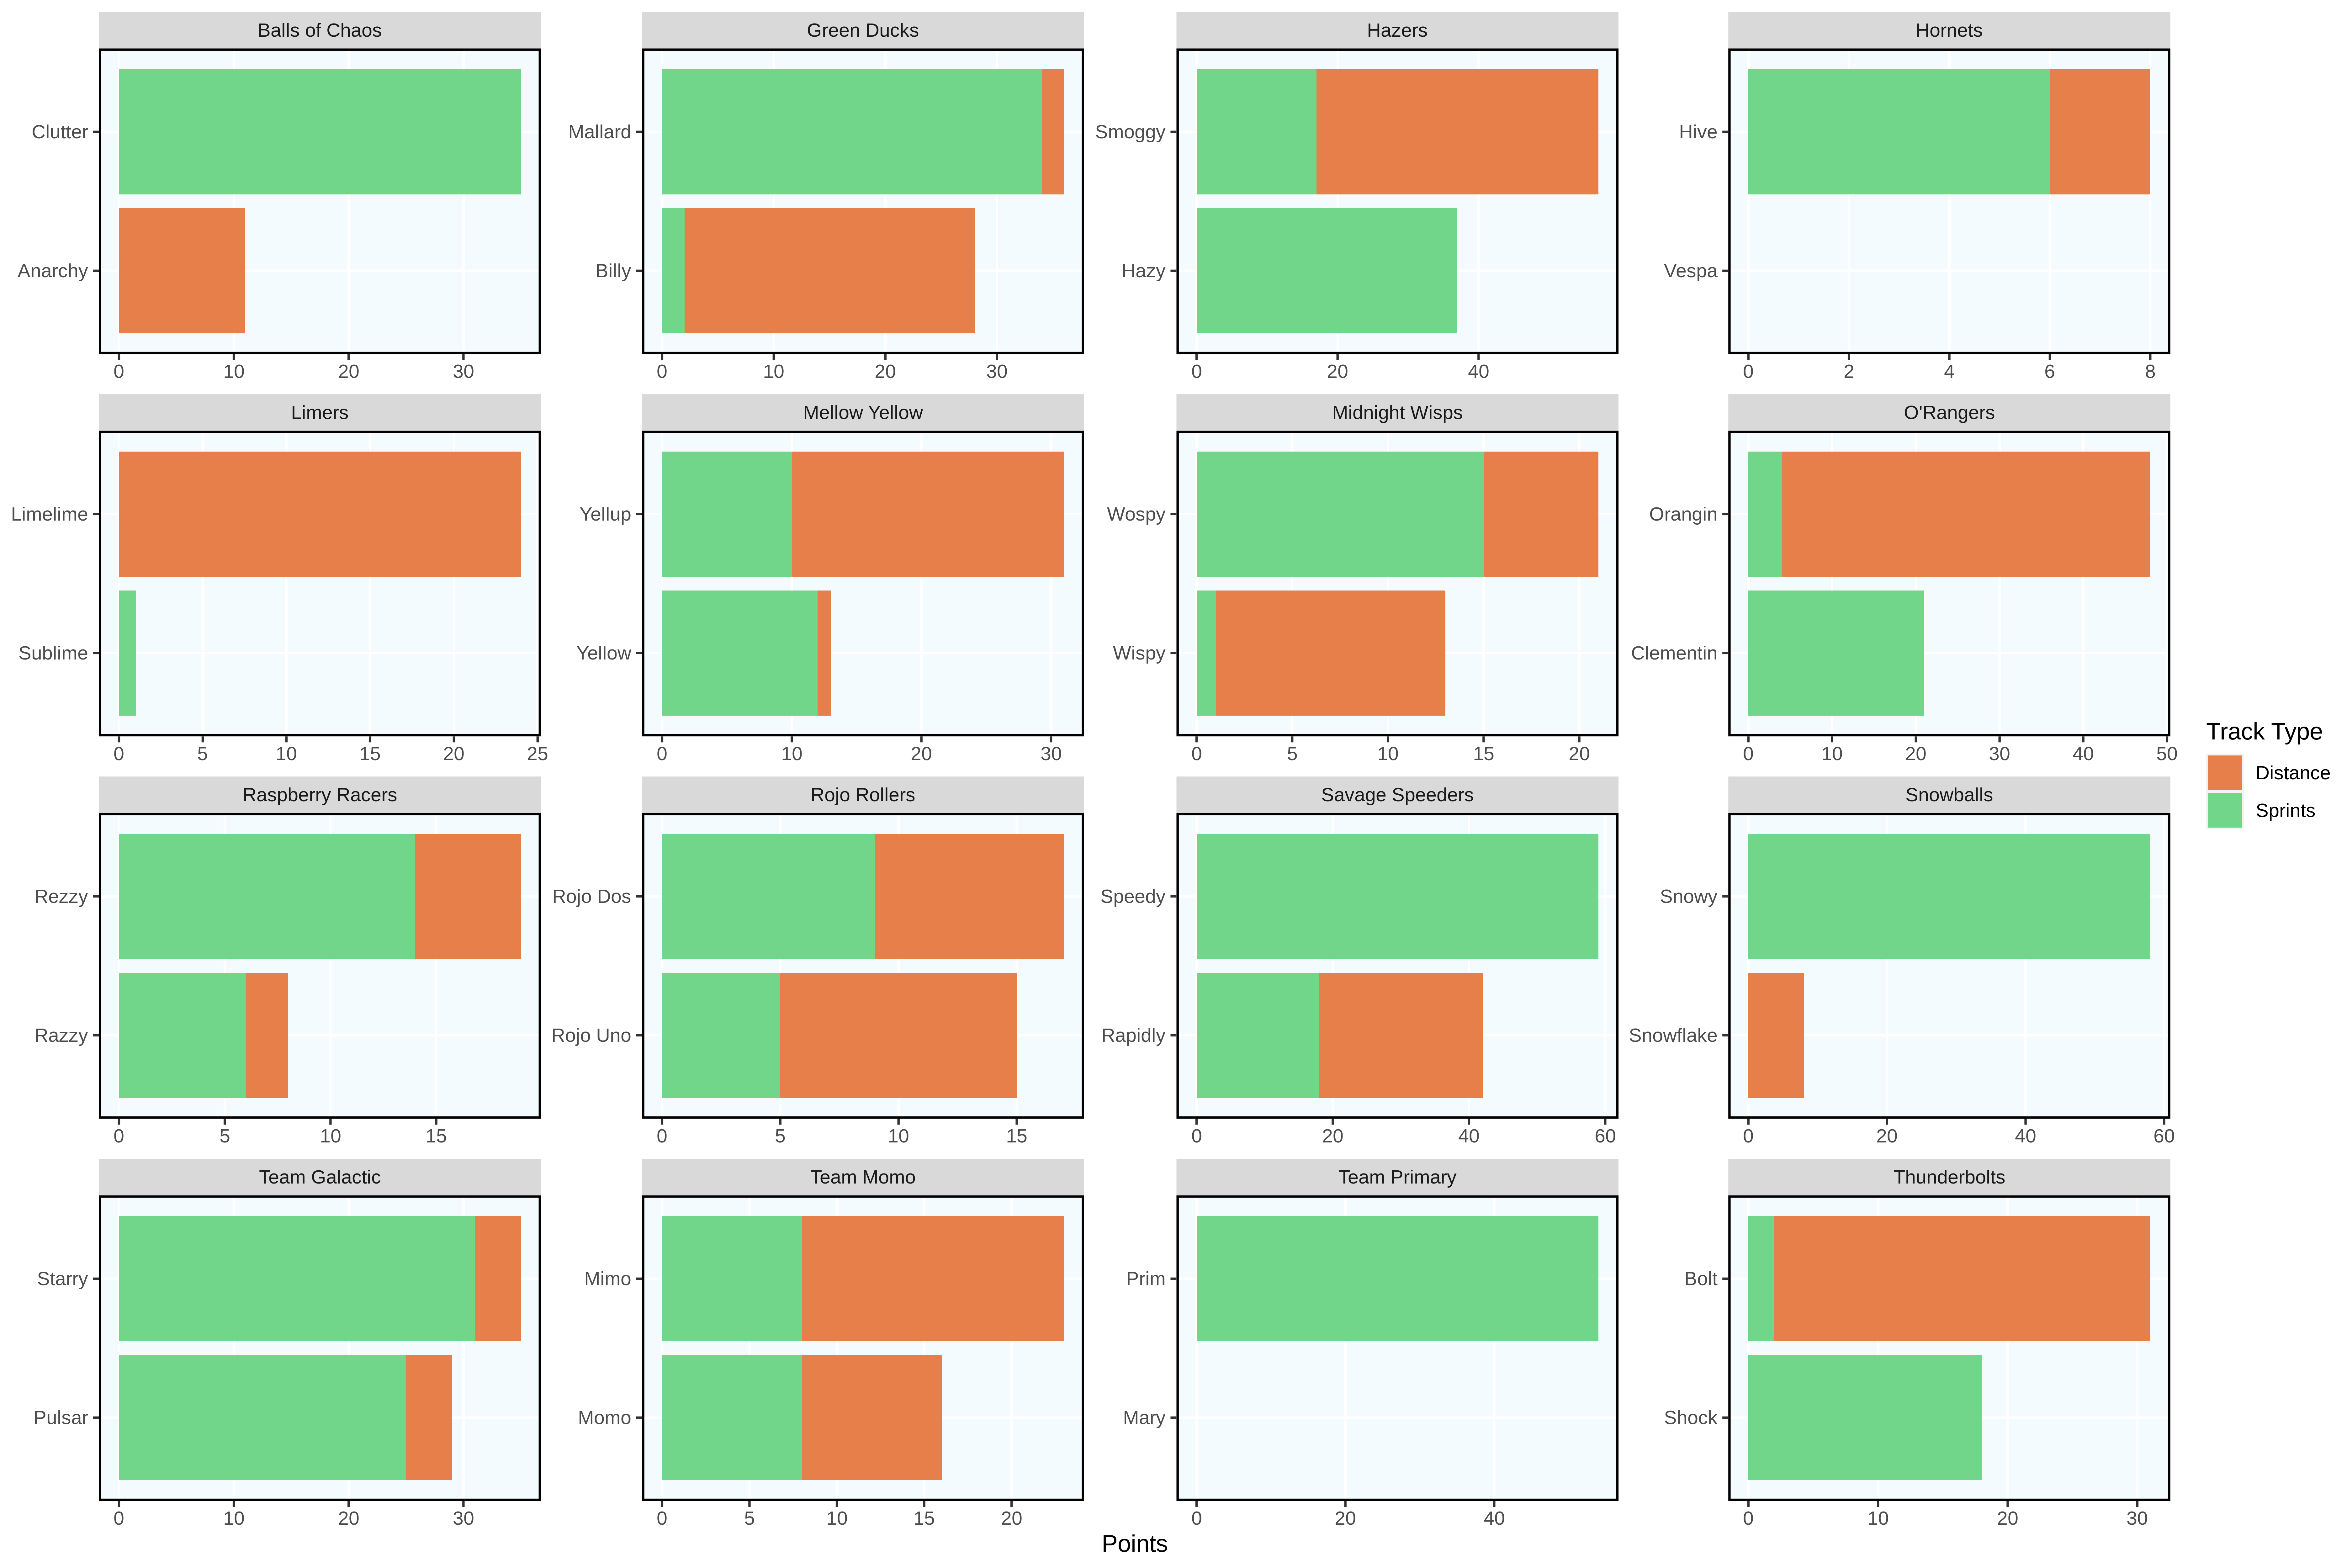

In [15]:
options(repr.plot.width=15, repr.plot.height=10, repr.plot.res=500)
dist=ggplot(mar.distance,aes(x = reorder(Marble, value), y = value, fill=name)) +
  geom_bar(stat = 'identity') +
  coord_flip() +
  facet_wrap(~Team, scales = 'free') +
  labs(x = NULL, 
       y = "Points")+
  theme(panel.background = element_rect(fill = '#f4fbfe'),
        panel.grid.minor = element_blank(),
        panel.border = element_rect(fill=NA,size=1))+
    scale_fill_manual(values=c("#E77F4B","#71D68A"),labels =c("Distance", "Sprints"),name = "Track Type",)
dist

Each marble earns the majority of their point in one style of race vs another- with the exception of Rojo Dos, Rapidly, and Momo. Therefore, the length of the course seems to influence which batch of marbles scores points. However, several teams seem to have marbles that excel in opposite categories like Green Ducks, Hazers and Thunderbolts. More well rounded teams like these may perform better overall, as Hazers were among the top scoring teams of this tournament. However, since 5 of the 8 round were sprints, strong sprinters like Savage Speeders have an advantage in this tournament and they might preform better in the 5 meter sprint as well. 

# Where to bet your money?

Given everything I have looked at, I have come to a few conclusions. Finishing high in the Qualifier might not be a good indication of which marble will win overall since while the median difference is 0, there is a lot of variation with several large position jumps. However, the marble team's consistency and the length of the course may be good indications of who will win.  In fact, the 2020 Marble League Championship Winners(Jun 21-Aug 8), Savage Speeders, had one of the highest consistency scores and a strong sprinter in aptly named Speedy. 

I decided to make a regression model for prediciting team points. I used a stepwise regression model to see which of the variables I looked at were significant. Then I applied that model to data from the 5 meter sprint to see if I can predict the winner. 

My first step is combining `mar.wide` and `mar.time` datasets created for the first and second graphs.

In [16]:
#Model based on what I looked at
mar.type<-mar.wide%>%
    select(Marble,Team,round,Qual,Pts)%>%
    group_by(Marble,Team)%>%
    mutate(track.length= ifelse(round=='R1',12.81,
                               ifelse(round=='R2',14.05,
                               ifelse(round=='R3',12.05,
                               ifelse(round=='R4',13.20,
                               ifelse(round=='R5',14.55,
                               ifelse(round=='R6',11.90,
                               ifelse(round=='R7',14.38,NA))))))))
mar.time2<-mar.time%>% 
          select(Team,mean.time,CTP_Consistency,)
mar.predict<-mar.time2%>% full_join(mar.type)
mar.predict%>%head


Joining, by = "Team"



Team,mean.time,CTP_Consistency,Marble,round,Qual,Pts,track.length
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
Balls of Chaos,28.21286,-3,Anarchy,R1,NA,NA,12.81
Balls of Chaos,28.21286,-3,Anarchy,R2,9,1,14.05
Balls of Chaos,28.21286,-3,Anarchy,R3,NA,NA,12.05
Balls of Chaos,28.21286,-3,Anarchy,R4,14,0,13.20
Balls of Chaos,28.21286,-3,Anarchy,R5,NA,NA,14.55
Balls of Chaos,28.21286,-3,Anarchy,R6,10,0,11.90


In order to create my model and test it's accuracy, I am going to create 2 datasets (`Train and Test`) from `mar.predict`. `Train` will be 70% of the observations in the original and used in the `step()` function to find the model. Then, the remaining 30% in the `Test` dataset will be used to check how accurate the model is by looking at the mean and standard deviation of the difference between the actual and the predicted points.   

In [17]:
#Creating Test and Train
smp.size=floor(0.7*nrow(mar.predict)) 

set.seed(216)
test.disc = sample(seq_len(nrow(mar.predict)),size = smp.size)

Train = mar.predict[test.disc,]
Test = mar.predict[-test.disc,]

Train%>%head

Team,mean.time,CTP_Consistency,Marble,round,Qual,Pts,track.length
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
Rojo Rollers,27.87857,-0.2,Rojo Uno,R8,10,1,NA
Savage Speeders,26.87143,8.4,Speedy,R3,7,8,12.05
Green Ducks,27.54143,4.8,Billy,R4,11,0,13.20
Savage Speeders,26.87143,8.4,Rapidly,R2,6,18,14.05
Mellow Yellow,27.58857,-3.8,Yellup,R1,NA,NA,12.81
Hornets,28.21286,-13.4,Vespa,R2,NA,NA,14.05


In [18]:
#using step() to fit a regression model stepwise
nul_mod=glm(Pts~1, data=Train)
full_mod=glm(Pts~CTP_Consistency + mean.time + track.length + Qual, data=Train)
step(nul_mod, scope=list(lower=nul_mod, upper=full_mod, direction="both")) #both indicated to apply the steps in both directions 
                                                                           #(ie adding variables to nul_model and  
                                                                           # subrtacting variables from ful_mod)


Start:  AIC=630.59
Pts ~ 1



Warning message in add1.glm(fit, scope$add, scale = scale, trace = trace, k = k, :
“using the 80/93 rows from a combined fit”


                  Df Deviance    AIC
+ Qual             1   2977.7 612.16
+ CTP_Consistency  1   3343.9 621.44
+ mean.time        1   3373.8 622.16
<none>                 3843.8 630.59
+ track.length     1   3843.2 632.58

Step:  AIC=603.55
Pts ~ Qual



Warning message in add1.glm(fit, scope$add, scale = scale, trace = trace, k = k, :
“using the 80/93 rows from a combined fit”


                  Df Deviance    AIC
+ CTP_Consistency  1   2683.1 597.21
+ mean.time        1   2818.3 601.15
<none>                 3360.9 603.55
+ track.length     1   2977.2 605.53
- Qual             1   4592.8 630.59

Step:  AIC=593.17
Pts ~ Qual + CTP_Consistency



Warning message in add1.glm(fit, scope$add, scale = scale, trace = trace, k = k, :
“using the 80/93 rows from a combined fit”


                  Df Deviance    AIC
<none>                 2942.0 593.17
+ track.length     1   2680.5 595.09
+ mean.time        1   2682.1 595.14
- CTP_Consistency  1   3360.9 603.55
- Qual             1   3894.9 617.26



Call:  glm(formula = Pts ~ Qual + CTP_Consistency, data = Train)

Coefficients:
    (Intercept)             Qual  CTP_Consistency  
        11.9562          -0.7099           0.3669  

Degrees of Freedom: 92 Total (i.e. Null);  90 Residual
  (86 observations deleted due to missingness)
Null Deviance:	    4593 
Residual Deviance: 2942 	AIC: 593.2

### The Model
Fitting the regression stepwise has identified that Qualifier position and CTP_Consistency are the variables that best predict the points the teams will score. The negative coefficient for the qualifier variable is consistent with my findings that teams tend to finish lower in the final than they did in the qualifier. Likewise, the positive coefficient for consistency score is similar the correlation we say in graph 1, where points scored increases as consistency increases.

So my model will `glm(formula = Pts ~ Qual + CTP_Consistency, data = Train)`. Let's look at how well it predicts the points for `Test` observations. 

In [19]:
model1=glm(formula = Pts ~ Qual + CTP_Consistency, data = Train) #model
fit.Test = predict(model1,na.rm=TRUE, newdata=Test) #predicting points for Test
holdoutresid.Test = Test$Pts-fit.Test #difference between actual and predicted points

mean(holdoutresid.Test,na.rm=TRUE)
sd(holdoutresid.Test,na.rm=TRUE)

[1] 2.747158

[1] 6.676123

#### How well the model predicts the points for Test
I wanted to look at the mean and standard deviation of the difference between actual points and predicted points in the test data to check the model's accuracy. With a mean difference of 2 points and standard deviation of ~ 6, this model may not be very accurate since 6 pts is the difference between 4th and 7th.  Let's see how it does predicting the 5 meet sprint anyways.

Since the qualifier for this event was split into an actual qualifier and a friendly among teams actomatically advancing to the final, I decided to use the qualifying times to assign everyone their qualifying finishing position. Also, more teams were at the championship then are included in this data set so I am hoping to see how well the model does at predicting points for the teams I have information on.

In [20]:
#Making the data sets 
teams<-c('Balls of Chaos',"Hornets","Mellow Yellow","Midnight Wisps","O\'Rangers","Rojo Rollers","Savage Speeders","Snowballs","Team Momo","Team Primary","Thunderbolts","Raspberry Racers","Green Ducks","Team Galactic","Hazers")
times<-c(5.320,5.292,5.260,5.431,5.363,5.352,5.203,5.497,5.326,5.344,5.285,5.245,5.257,5.266,5.273)
Five.m<-data.frame(Team=teams,Times=times)
Five.m<-Five.m%>%arrange(Times)%>%mutate(Qual = row_number())
#My model's dataset
team.mod1<-mar.time%>%
        select(Team,CTP_Consistency)
Five.mod1<-Five.m%>%left_join(team.mod1)

Joining, by = "Team"



In [21]:
#My Model's prediction
predictions<-predict(model1,na.rm=TRUE,newdata=Five.mod1)
predictions<-predictions%>%as_tibble()%>%as.data.frame()

predictions<-predictions%>%mutate(id = row_number())
Five.mod1<-Five.mod1%>%mutate(id = row_number())
pred<-Five.mod1%>%full_join(predictions)
pred%>%arrange(desc(value))

Joining, by = "id"



Team,Times,Qual,CTP_Consistency,id,value
<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>
Savage Speeders,5.203,1,8.4,1,14.3282541
Green Ducks,5.257,3,4.8,3,11.5875774
Hazers,5.273,6,9.3,6,11.1089268
Team Galactic,5.266,5,3.9,5,9.8375456
Raspberry Racers,5.245,2,-6.1,2,8.2982161
Mellow Yellow,5.260,4,-3.8,4,7.7222818
Thunderbolts,5.285,7,-0.8,7,6.6932729
Balls of Chaos,5.320,9,-3.0,9,4.4662640
Team Momo,5.326,10,-2.9,10,3.7930460


### My Prediction
Some of the predictions were fairly close, like Savage Speeders and the general points of Green Ducks, Hazers, and Team Galactic. Mellow Yellow, and Raspberry Racers scored much lower than predicted and Midnight Whisps scored higher than predicted. The rest were within a few points. 

Obviously the prediction was not perfect but overall, I am pretty pleased with this model. I managed to predict the top 4 teams. I think, given consistency on all the teams, I could be a fairly sucessful Marble League Gambler. 


![alt text here](https://raw.githubusercontent.com/jcaldous/Bios512/main/B%20512/Final%20project%20draft/Screen%20Shot%202020-11-13%20at%207.56.32%20PM.png)